In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def DFT(f):
    N = len(f)
    F = np.zeros(N, dtype=complex)

    for k in range(N):
        for j in range(N):
            F[k] += f[j] * np.exp(-2j * np.pi * (j) * (k) / N)
        F[k] /= N

    return F

def DFTINV(f):
    N = len(f)
    F = np.zeros(N, dtype=complex)

    for k in range(N):
        for j in range(N):
            F[k] += f[j] * np.exp(2j * np.pi * (j) * (k) / N)

    return F

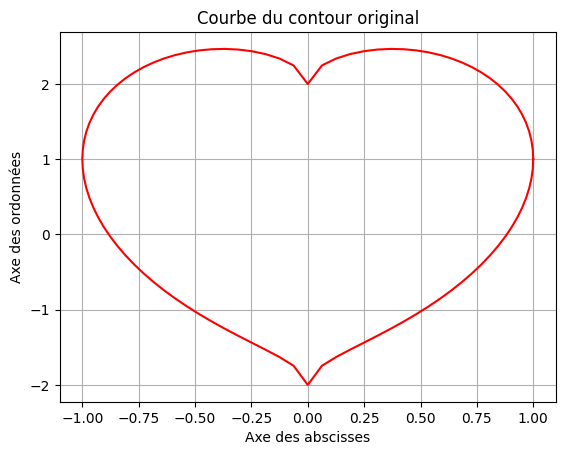

In [ ]:
t = np.arange(0, 1.01, 0.01)
xt = np.cos(2 * np.pi * t)
yt = 2 * np.sin(2 * np.pi * t) + np.sqrt(np.abs(np.cos(2 * np.pi * t)))

plt.plot(xt, yt, 'red')
plt.xlabel('Axe des abscisses')
plt.ylabel('Axe des ordonnées')
plt.title('Courbe du contour original')
plt.plot(xt[1], yt[1], 'red')
plt.grid(True)

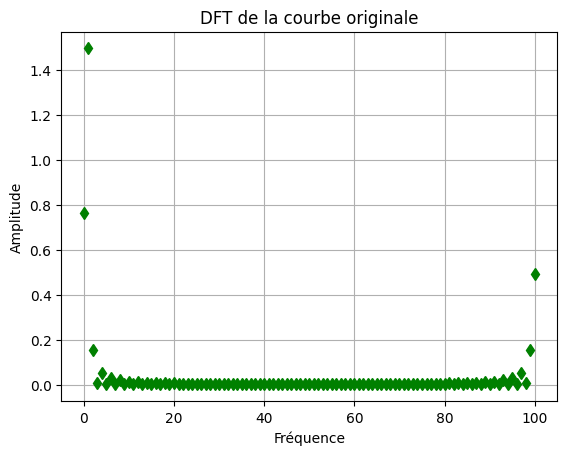

In [ ]:
func = xt + 1j * yt
F = DFT(func)

plt.figure(2)
plt.plot(np.abs(F), 'gd')
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')
plt.title('DFT de la courbe originale')
plt.grid(True)

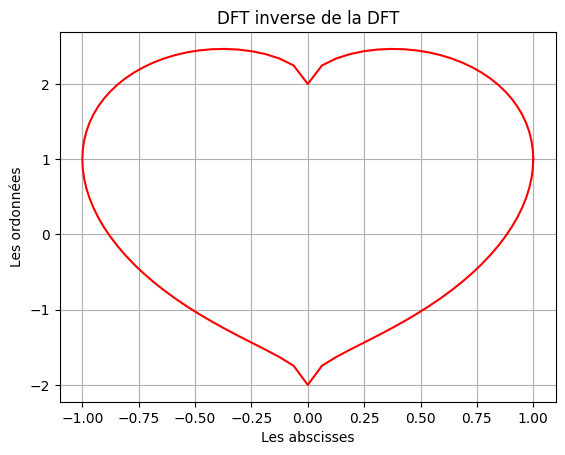

In [ ]:
C = DFTINV(F)

plt.figure(3)
plt.plot(np.real(C), np.imag(C), 'red')
plt.xlabel('Les abscisses')
plt.ylabel('Les ordonnées')
plt.title('DFT inverse de la DFT')
plt.grid(True)

plt.show()

In [ ]:
a = 2
f2t = a * xt + 1j * a * yt

beta = 0.5
f3t = np.exp(2j * np.pi * beta) * (xt+xt**2 + 1j * yt)

t0 = 0.2
f4t = np.roll(xt + 1j * yt, int(t0 * len(t)))

b = 1
f5t = xt + 1j * (yt + b)

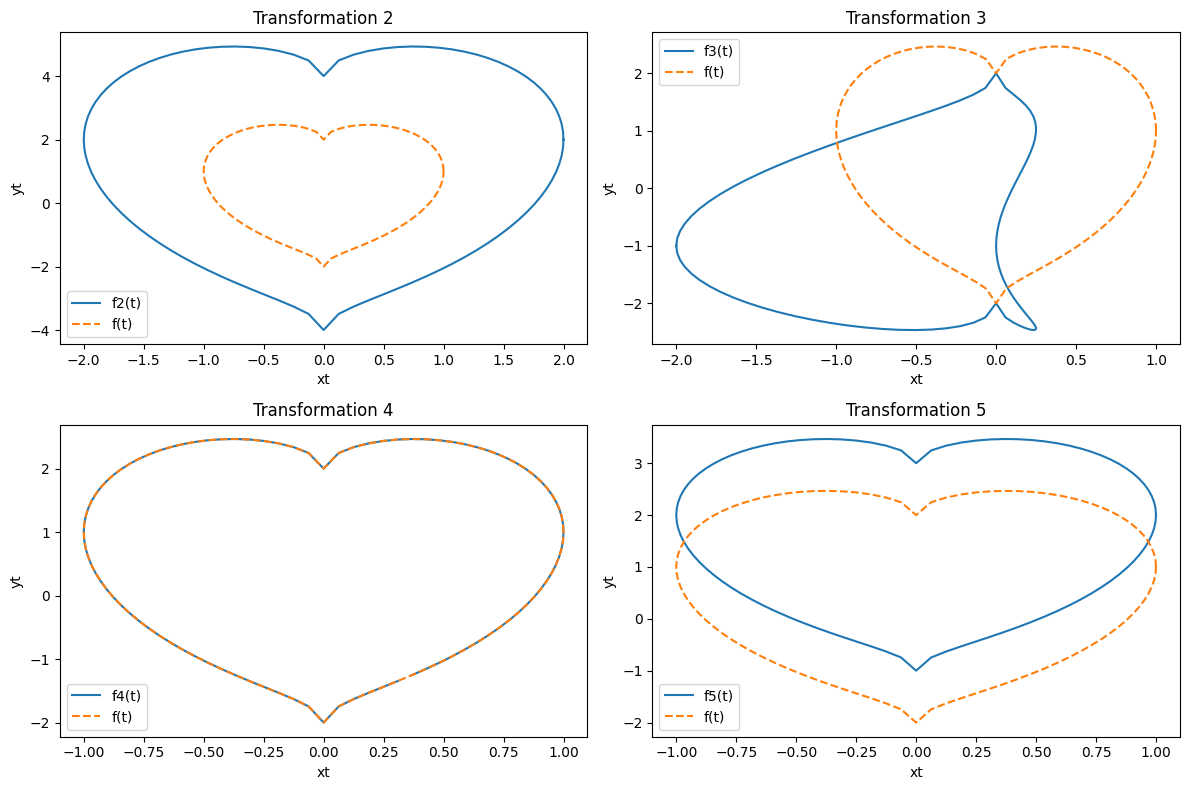

In [ ]:
# Affichage des transformations
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(np.real(f2t), np.imag(f2t), label='f2(t)')
plt.plot(xt, yt, label='f(t)', linestyle='--')
plt.title('Transformation 2')
plt.xlabel('xt')
plt.ylabel('yt')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(np.real(f3t), np.imag(f3t), label='f3(t)')
plt.plot(xt, yt, label='f(t)', linestyle='--')
plt.title('Transformation 3')
plt.xlabel('xt')
plt.ylabel('yt')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(np.real(f4t), np.imag(f4t), label='f4(t)')
plt.plot(xt, yt, label='f(t)', linestyle='--')
plt.title('Transformation 4')
plt.xlabel('xt')
plt.ylabel('yt')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(np.real(f5t), np.imag(f5t), label='f5(t)')
plt.plot(xt, yt, label='f(t)', linestyle='--')
plt.title('Transformation 5')
plt.xlabel('xt')
plt.ylabel('yt')
plt.legend()

plt.tight_layout()
plt.show()

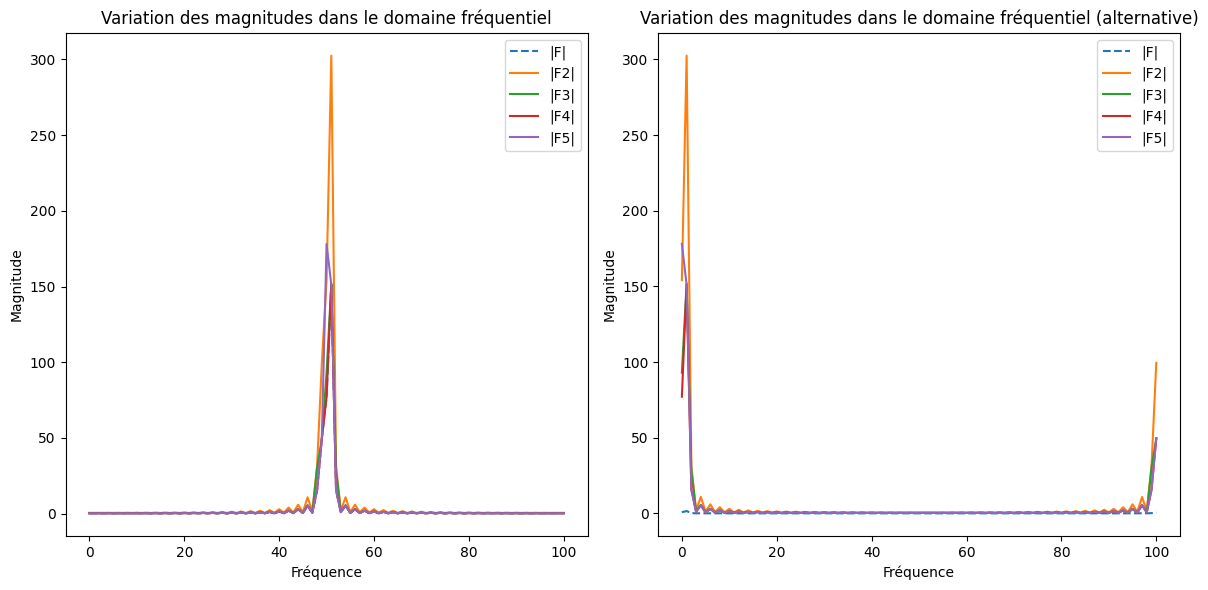

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.fft.fftshift(np.abs(np.fft.fft(xt + 1j * yt))), label='|F|', linestyle='--')
plt.plot(np.fft.fftshift(np.abs(np.fft.fft(np.real(f2t) + 1j * np.imag(f2t)))), label='|F2|')
plt.plot(np.fft.fftshift(np.abs(np.fft.fft(np.real(f3t) + 1j * np.imag(f3t)))), label='|F3|')
plt.plot(np.fft.fftshift(np.abs(np.fft.fft(np.real(f4t) + 1j * np.imag(f4t)))), label='|F4|')
plt.plot(np.fft.fftshift(np.abs(np.fft.fft(np.real(f5t) + 1j * np.imag(f5t)))), label='|F5|')
plt.title('Variation des magnitudes dans le domaine fréquentiel')
plt.xlabel('Fréquence')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(1, 2, 2)
magnitude_f = np.abs(F)
magnitude_f2 = np.abs(np.fft.fft(np.real(f2t) + 1j * np.imag(f2t)))
magnitude_f3 = np.abs(np.fft.fft(np.real(f3t) + 1j * np.imag(f3t)))
magnitude_f4 = np.abs(np.fft.fft(np.real(f4t) + 1j * np.imag(f4t)))
magnitude_f5 = np.abs(np.fft.fft(np.real(f5t) + 1j * np.imag(f5t)))

plt.plot(magnitude_f, label='|F|', linestyle='--')
plt.plot(magnitude_f2, label='|F2|')
plt.plot(magnitude_f3, label='|F3|')
plt.plot(magnitude_f4, label='|F4|')
plt.plot(magnitude_f5, label='|F5|')
plt.title('Variation des magnitudes dans le domaine fréquentiel (alternative)')
plt.xlabel('Fréquence')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()

#**Crimmin's Descriptors and the Completeness Property**

In [ ]:
def compute_crimmins_descriptors(F,k0, k1):

    N = len(F)
    tabK = np.concatenate((np.arange(0, N//2), np.arange(-N//2, 0)))
    descriptors = []

    for k in range(min(60, len(F))):
      if (k != k0) and (k != k1):
        descriptors.append(np.power(F[k], (tabK[k0] - tabK[k1]), dtype=complex) * np.power(F[k0], (tabK[k1] - tabK[k]), dtype=complex) * np.power(F[k1], (tabK[k] - tabK[k0]), dtype=complex) )
      elif (k == k0):
        descriptors.append(np.abs(F[k0]))
      elif (k == k1):
        descriptors.append(np.abs(F[k1]))
    return descriptors




In [ ]:
def inverse_Crimmins_descriptors(descriptors, F, k0, k1):
    N = len(F)
    tabK = np.concatenate((np.arange(0, N//2), np.arange(-N//2, 0)))
    R = np.zeros(N, dtype=complex)

    # Iterate only over the available descriptors
    for k in range(len(descriptors)):
        if (k != k0) and (k != k1):
            a1 = np.power(F[k0], (tabK[k] - tabK[k1]), dtype=complex)
            b1 = np.power(F[k1], (tabK[k0] - tabK[k]), dtype=complex)
            R[k] = np.power(descriptors[k] * a1 * b1, 1 / (tabK[k0] - tabK[k1]), dtype=complex)
        elif k == k0 or k == k1:
            R[k] = F[k]  # Use the original value for k0 and k1

    return R


In [ ]:
def descriptors_to_column(descriptors):
    descriptors = np.array(descriptors)  # Ensure it's a NumPy array
    r = np.abs(descriptors)  # Modulus
    theta = np.angle(descriptors)  # Angle in radians

    # Flatten to a single column matrix of dimension (40, 1)
    combined = np.empty((2 * len(descriptors), 1))
    combined[0::2, 0] = r       # Insert modulus at even indices
    combined[1::2, 0] = theta   # Insert angle at odd indices

    return combined
F3 = DFT(f3t)

descriptors_F3 = compute_crimmins_descriptors(F3, 3,4 )

column_matrix = descriptors_to_column(descriptors_F3)
print("Combined (120x1) column matrix:" , "\n")
print(column_matrix.shape)
import numpy as np

def column_to_descriptors(column_matrix):
    r = column_matrix[0::2, 0]  # Modulus from even rows
    theta = column_matrix[1::2, 0]  # Angles from odd rows

    # Reconstruct Fourier coefficients as complex numbers
    descriptors = r * np.exp(1j * theta)

    return descriptors

# Example usage
descriptors_reconstructed = column_to_descriptors(column_matrix)
print(column_matrix)



Combined (120x1) column matrix: 

(120, 1)
[[ 2.37473526e-04]
 [-8.10431890e-01]
 [ 5.76141549e-04]
 [ 1.26512231e+00]
 [ 1.22415001e-02]
 [ 1.78533032e+00]
 [ 1.36115223e-02]
 [ 0.00000000e+00]
 [ 5.39506703e-02]
 [ 0.00000000e+00]
 [ 3.43563908e+01]
 [ 2.99155331e+00]
 [ 2.85871835e+01]
 [-1.23182658e+00]
 [ 7.47811662e+02]
 [-2.19740428e+00]
 [ 6.64439311e+02]
 [-1.87138499e+00]
 [ 1.49746594e+04]
 [ 1.36090882e+00]
 [ 1.41714505e+04]
 [-3.12572905e+00]
 [ 2.66802211e+05]
 [ 2.02817211e+00]
 [ 2.79852304e+05]
 [ 2.54237303e+00]
 [ 4.72957839e+06]
 [-3.60431805e-01]
 [ 5.35194253e+06]
 [ 1.26677761e+00]
 [ 7.88143028e+07]
 [ 2.12767530e-02]
 [ 9.81571842e+07]
 [ 6.69393684e-01]
 [ 1.32152114e+09]
 [-2.12685566e+00]
 [ 1.77366566e+09]
 [-6.20944739e-01]
 [ 2.13235466e+10]
 [-1.95471625e+00]
 [ 3.12070183e+10]
 [-1.20592449e+00]
 [ 3.46595308e+11]
 [ 2.36159118e+00]
 [ 5.44926870e+11]
 [-2.50697324e+00]
 [ 5.49179011e+12]
 [ 2.37394359e+00]
 [ 9.34145790e+12]
 [-3.08242795e+00]
 [ 8.75

# **Exemple de Reconstruction à partir des descripteurs de Crimmins**

[(4.584831301843347e-05-6.365174302315015e-05j), (-7.753240596097782e-06+0.0002187035159536397j), (0.006940930018342285+0.009235673575043776j), 0.019634092231698753, 0.10746998718627461, (-54.105904269226954+7.746590312378493j), (9.990924035323566-53.534358299614844j), (-1754.1700664738291-1202.0200302519372j), (-1552.9299749281388-1846.51140579276j), (47588.67194379656+63326.65942676131j), (-83174.27387371074+52039.92836140306j), (720054.7949425742+2541362.10140895j), (-603995.7318053022+3644350.749360964j), (29965497.695420578-83223333.55727014j), (129642474.74646159+36585620.2372j), (1234702916.0163152-2500697753.461397j), (4019643652.181797-2456391791.410842j), (-85464571642.34274+24015454289.40677j), (-71685614659.59422-145626889581.0569j), (-2554963754271.358+936598424531.6385j), (-5192172195829.499-1642100720111.1558j), (66854633247872.02+51098741640020.11j), (-67793654436884.445+168176585367488.88j), (2308461500542821+1053430463036362.5j), (2369647868240461.5+5433083718890733j)

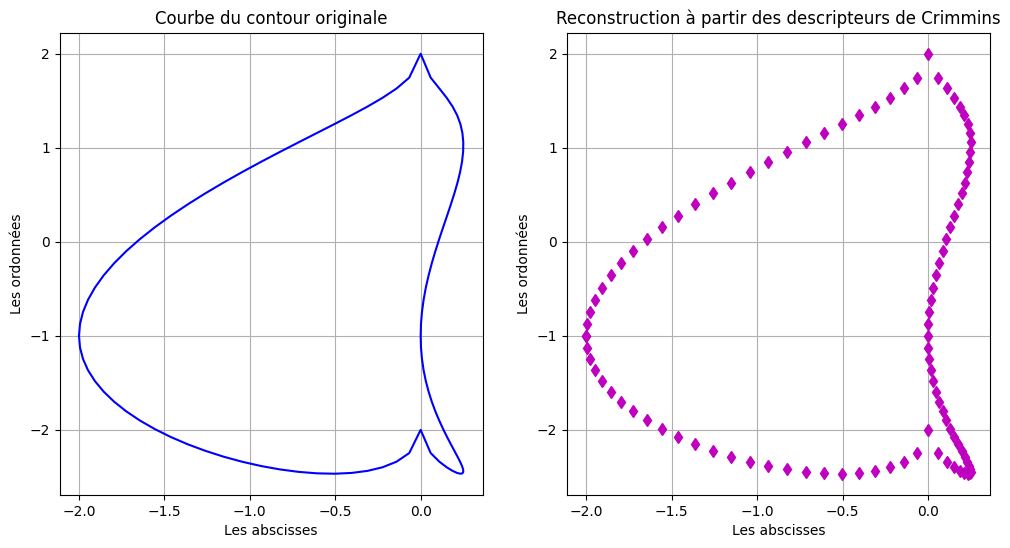

In [ ]:
t = np.arange(0, 1.01, 0.01)
xt = np.cos(2 * np.pi * t)
yt = 2 * np.sin(2 * np.pi * t) + np.sqrt(np.abs(np.cos(2 * np.pi * t)))
func = xt**2 + 1j * yt**2
F = DFT(func)
F2 = DFT(f2t)
F3 = DFT(f3t)
F4 = DFT(f4t)
F5 = DFT(f5t)
descriptors_F = compute_crimmins_descriptors(F, 3,4 )
descriptors_F2 = compute_crimmins_descriptors(F2, 3,4 )
descriptors_F3 = compute_crimmins_descriptors(F3, 3,4 )
descriptors_F4 = compute_crimmins_descriptors(F4, 3,4 )

print(descriptors_F2)

print(np.array(descriptors_F).shape)

F_recons = inverse_Crimmins_descriptors(  descriptors_F3  ,F3,3,4)

C_recons = DFTINV(F_recons)

# Affichage de la DFT inverse
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(np.real(f3t), np.imag(f3t), 'b')
ax1.set_xlabel('Les abscisses')
ax1.set_ylabel('Les ordonnées')
ax1.set_title('Courbe du contour originale')
ax1.grid(True)

ax2.plot(np.real(C_recons), np.imag(C_recons), 'md')
ax2.set_xlabel('Les abscisses')
ax2.set_ylabel('Les ordonnées')
ax2.set_title('Reconstruction à partir des descripteurs de Crimmins')
ax2.grid(True)



plt.show()



In [ ]:
def descriptors_to_column(descriptors):
    descriptors = np.array(descriptors)  # Ensure it's a NumPy array
    r = np.abs(descriptors)  # Modulus
    theta = np.angle(descriptors)  # Angle in radians

    # Flatten to a single column matrix of dimension (40, 1)
    combined = np.empty((2 * len(descriptors), 1))
    combined[0::2, 0] = r       # Insert modulus at even indices
    combined[1::2, 0] = theta   # Insert angle at odd indices

    return combined
column_matrix = descriptors_to_column(descriptors_F)
#print(descriptors_F, "\n")
#print("Combined (40x1) column matrix:" , "\n")
#print(column_matrix)
import numpy as np

def column_to_descriptors(column_matrix):
    r = column_matrix[0::2, 0]  # Modulus from even rows
    theta = column_matrix[1::2, 0]  # Angles from odd rows

    # Reconstruct Fourier coefficients as complex numbers
    descriptors = r * np.exp(1j * theta)

    return descriptors

# Example usage
descriptors_reconstructed = column_to_descriptors(column_matrix)
#print("Reconstructed Fourier coefficients:")
#print(descriptors_reconstructed)



In [ ]:
def process_shapes_from_csv(file_path, p, q):
    # Read CSV file
    data = pd.read_csv(file_path)

    # Ensure the CSV contains 'shape_id', 'x', and 'y' columns
    if not {'shape_id', 'x', 'y'}.issubset(data.columns):
        raise ValueError("CSV must contain 'shape_id', 'x', and 'y' columns.")

    descriptors_list = []

    # Group data by shape_id
    grouped = data.groupby('shape_id')

    for shape_id, group in grouped:
        x_coords = group['x'].values
        y_coords = group['y'].values
        # Form a complex signal
        func = x_coords**2 + 1j * y_coords**2

        # Compute DFT
        F = DFT(func)

        # Compute Crimmins descriptors
        descriptors = compute_crimmins_descriptors(F, p, q)
        descriptors_list.append(descriptors)

    return descriptors_list

# Example usage
# Create a CSV file named "shapes.csv" with columns: shape_id, x, y
# Each shape's points should have the same 'shape_id'

file_path = "shapes.csv"  # Replace with your CSV file path
p, q = 3, 4  # Crimmins descriptor parameters

# Compute descriptors for all shapes
descriptors_list = process_shapes_from_csv(file_path, p, q)


In [ ]:
import numpy as np

def descriptors_to_column(descriptors_list):
    n = len(descriptors_list)  # Number of shapes
    # Initialize the output matrix (40 rows for each descriptor and n columns for each shape)
    descriptors_matrix = np.empty((2 * len(descriptors_list[0]), n))

    # Loop through each shape's descriptors
    for shape_idx, descriptors in enumerate(descriptors_list):
        # Compute modulus (r) and angle (theta)
        r = np.abs(descriptors)  # Modulus (magnitude)
        theta = np.angle(descriptors)  # Angle in radians

        # Fill the 40 x n matrix with r and theta for each shape
        descriptors_matrix[0::2, shape_idx] = r  # Insert modulus at even indices (r0, r1, ...)
        descriptors_matrix[1::2, shape_idx] = theta  # Insert angle at odd indices (θ0, θ1, ...)

    return descriptors_matrix
descriptors_list = process_shapes_from_csv(file_path, p, q)
descriptors_matrix = descriptors_to_column(descriptors_list)


print("Descriptors matrix (120 x n):")
print(descriptors_matrix.shape)
import numpy as np

# Save the descriptors_matrix to a .npy file
np.save('descriptors_matrix.npy', descriptors_matrix)



# **Ghorbel’s descriptors and the stability property**

In [ ]:
def calculate_ghorbel_descriptors(F, k0, k1, p, q):
    N = len(F)
    tabK = np.concatenate((np.arange(0, N//2), np.arange(-N//2, 0)))
    descriptors = []
    alpha_k0 = np.abs(F[k0])
    alpha_k1 = np.abs(F[k1])
    for k in range(len(F)):
      if (k != k0) and (k != k1):
        descriptors.append((np.power(F[k], (tabK[k0] - tabK[k1]), dtype=complex) * np.power(F[k0], (tabK[k1] - tabK[k]), dtype=complex) * np.power(F[k1], (tabK[k] - tabK[k0]), dtype=complex)) / (((alpha_k0 ** (tabK[k1] - tabK[k] - q)) * (alpha_k1 ** (tabK[k] - tabK[k0] - p)))))
      elif (k == k0):
        descriptors.append(np.abs(F[k0]))
      elif (k == k1):
        descriptors.append(np.abs(F[k1]))
    return descriptors


In [ ]:
def inverse_ghorbel_descriptors(descriptors,F, k0, k1, p, q):

  teta_0 = np.angle(F[k0], deg=True)
  teta_1 = np.angle(F[k1], deg=True)
  N = len(descriptors)
  tabK = np.concatenate((np.arange(0, N//2), np.arange(-N//2, 0)))
  ak = []

  for k in range(len(tabK)):
    if (k == k0):

      ak.append(np.power(descriptors[k0], (1/(tabK[k0] - tabK[k1] + p)), dtype=complex) * np.exp(2 * 1j * np.pi * teta_0))
    elif (k == k1):

      ak.append(np.power(descriptors[k1], (1/(tabK[k1] - tabK[k0] + q)), dtype=complex) * np.exp(2 * 1j * np.pi * teta_1))
    else:

      ik = np.power( descriptors[k], (1 / (tabK[k0] - tabK[k1])) , dtype=complex)
      ik0 = np.power(descriptors[k0], (-p / (tabK[k0] - tabK[k1]) * (tabK[k0] - tabK[k1] + q)) , dtype=complex)
      ik1 = np.power(descriptors[k1], (-q / (tabK[k0] - tabK[k1]) * (tabK[k1] - tabK[k0] + p)) , dtype=complex)
      coef = (2 * 1j * np.pi)/(tabK[k0] - tabK[k1])
      expg = np.exp(  coef * ( (tabK[k] *(teta_0 - teta_1)) - (tabK[k1] * teta_0) + (tabK[k0] * teta_1))  )
      ak.append(ik * ik0 * ik1 * expg)

  return ak

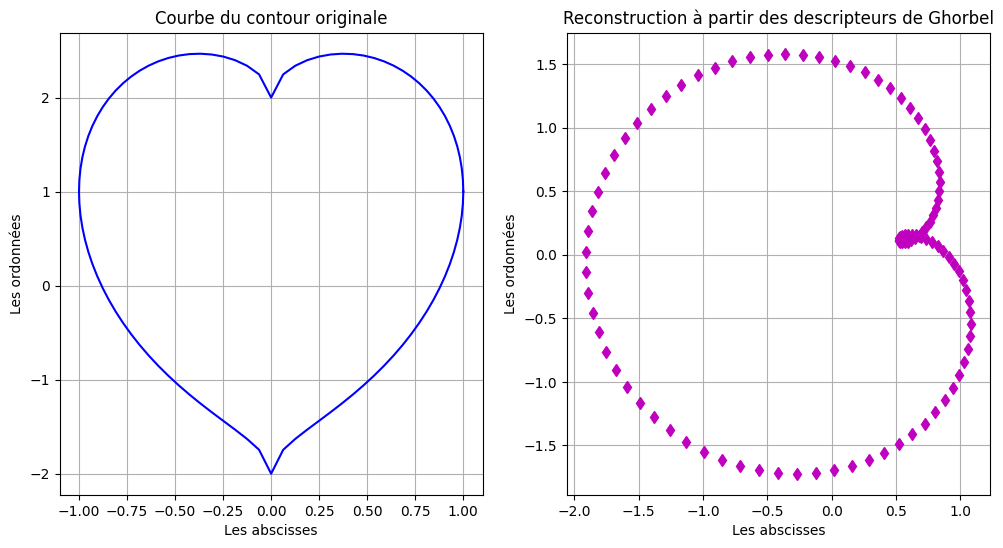

In [ ]:
desc = calculate_ghorbel_descriptors(F, k0=1, k1=2, p=3, q=4)
desc_recons = inverse_ghorbel_descriptors(desc,F, k0=1, k1=2, p=3, q=4)

C_ghorbel = DFTINV(desc_recons)

# Affichage de la DFT inverse
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(np.real(func), np.imag(func), 'b')
ax1.set_xlabel('Les abscisses')
ax1.set_ylabel('Les ordonnées')
ax1.set_title('Courbe du contour originale')
ax1.grid(True)

ax2.plot(np.real(-C_ghorbel), np.imag(-C_ghorbel), 'md')
ax2.set_xlabel('Les abscisses')
ax2.set_ylabel('Les ordonnées')
ax2.set_title('Reconstruction à partir des descripteurs de Ghorbel')
ax2.grid(True)



plt.show()